<a href="https://colab.research.google.com/github/pragneshrana/Algo_Trial/blob/master/EM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EM Algo.
If data points are given without label let's assume that it has generates the cluster. 

#Objective
The main objective of clustering algotihm is to minimize the intra-cluster variance and maximize the interclasss variance.

#Why EM is required?
For Fuel data set it was assumed that there is a similarity between fuel for given physical conidition. To find out such behaviour in the data points intially K-mean clustering technique was applied and based on silhouette score around ~0.55 which suggests that data points generates clusters but it's low value suggest that data points are scattered and it does not generates perfect cluster. 

Perfect variability of the data points can't be captured by K-measn algorithm as it assigns the data points based on distance from cluster centroids and **it does hard assignments to the data points.** <br>

**What K-means does?** <br>
The cost function in K-Measn clustering is given as, <br>
$$ J = \sum_{n=1}^{N} \sum_{k=1}^{K} r_{nk}  ||x_n - \mu_k||^2$$ <br>

where, <br>
$r_{nk} \in \{0,1\}$ <br>
$x_k$ is data points <br>
$\mu_k$  is cluster centroid <br>
By minimizing the two norm between cluster and centroid (centroid is just a mean of all the poins inside the specific cluster) iterativelly variacne is minimized.   <br>

Let's find out variance of the specific cluster(Interclass variacne) given that certain data points belongs to specific cluster. <br>
Points associated with specific cluster i is given by $D_i$. where i deontes $i^{th}$ cluster. <br>

$$Var(X|X \in  D_i)  \\
= E[ ||X-E(X)||^2 |X \in  D_i] \\
=\frac{1}{n_i} \sum_{X \in D_i} ||X-E(X)||^2 \\
$$

Now, as it was assumed that X$\in D_i$ has some probability will be assoiciated  with its cluster and other cluster as well which can be obtained by taking expectation of conditional variance.
so,<br>

$$E_i[Var(X|X \in  D_i)]\\
=\sum_i p(X \in D_i) * \frac{1}{n_i} \sum_{X \in D_i} ||X-E(X)||^2 \\
= \sum_{i=1}^{k}\frac{n_i}{n} \frac{1}{n_i} \sum_{X \in D_i} ||X-E(X)||^2 \\
= \frac{1}{n} \sum_{i=1}^{k} \sum_{X \in D_i} ||X-E(X)||^2
$$ <br>
Ref: https://stats.stackexchange.com/questions/198239/k-means-clustering-minimizes-conditional-variance <br>

K-Means actually minimizes the overall conditional variance but hard assignment of data points to cluster. And K-Means is special case of EM algortihm when covariance matrix is assumed to be diagonal matrix. <br>

so, for soft assignment of data points and to get rid of above complecity EM algorithm is used.<br>


#Gaussian Mixture Model<br>

EM algorithm works on gaussian mixture modelling. <br>
When data points follows complex distribution which can be represented using more than gaussian mixture models. <br>
Gaussian mixture models can be represented by linear superpostition of gaussian mixture models, <br>
$$
p(x) = \sum_{k=1}^{K} \pi_k \mathcal{N}(x|\mu_k,\Sigma_k)
$$<br>
Where $\pi_k = p(z_k=1)$ in this marginal distribution z is K dimentional **binary random variable** which same as one-hot encoading $z_k \in \{0,1\}$. <br>

$\pi_k$ can be seen as weights to the specific distribution and it must satisfy $\sum_{k=1}^{K} \pi_k =1$<br>

**Concept and Proof:** <bR>
If dataset follows more than one gaussian distribution then joint distribution (Joint distribution shows relatioship between two random variable) of $p(x,z)$ is $p(z) p(x|z)$<br>

as z follows 1 of K representation so, $$p(z=1) = \pi_k $$ or $$ p(z) = \prod_{k=1}^{K} \pi_k^{z_k} $$<br>
e.g.  z will be like for k=3 {0,0,1}<br>
(exempli gratia = for example)<br>

for, particular class, let's assume that it follows tha gaussian distribution so,<br>
$$ p(x|z_k=1) = \mathcal{N} (x|\mu_k,\Sigma_k)$$
in general it can be written as,
$$ p(x|z) = \prod_{k=1}^{K} \mathcal{N} (x|\mu_k,\Sigma_k)^{z_k}$$
multiplication as it was assumed that all samples are drawn independently <br>

Now, let's marginal distribution of x.<br>
$$p(x) = \sum_z p(z) p(x|z) \\
= \sum_z  \pi_k^{z_k} \prod_{k=1}^{K} \mathcal{N} (x|\mu_k,\Sigma_k)^{z_k} \\
= \sum_{j=1}^{K} \prod_{k=1}^{K}  (\pi_k \mathcal{N} (x|\mu_k,\Sigma_k))^{z_{kj}} \\
$$
$$
p(x)= \sum_{j=1}^{K}\pi_j \mathcal{N} (x|\mu_j,\Sigma_j)
$$
as, $z_{kj}$ can be represented by 1 of K representation <br>

for new data points(prediction),<br>
$$ \gamma(z_k) = p(z_k =1|x) $$<br>
$$ = \frac{p(z_k=1) p(x|z_k=1)}{\sum_{j=1}^{K}p(z_j=1)p(p(x|z_j=1)}$$<br>
$$ = \frac{\pi_k \mathcal{N} (x|\mu_k,\Sigma_k)} {\sum_{j=1}^{K}\pi_j\mathcal{N} (x|\mu_j,\Sigma_j)}$$<br>

$\gamma(z_k)$ is called responcibility, which actually shows respocility of data points to specific class.
This whole theory is valid for 1 data point x.<br>
<br>

**For whole dataset :**<br>
Now, let's take more genearalize case in which observation are made as, ${x_1,x_2,x_3,...,x_n}$ are i.i.d and dataset as matrix $N X D$ in which $n^{th}$ row is given by $x_n^T$ likewise, latent variable is Z is of matrix {N X K} with rows $z_n^{T}$.<br>
The log likelihood of the function is given by,<br>
$$ln  \ p(X|\pi,\mu,\Sigma) = \sum_{n=1}^{N}ln\bigg \{\sum_{k=1}^{K} \pi_k \mathcal{N}(x_n|\mu_k,\Sigma_k)\bigg \}$$

**Critical problem**:<br>
let's take, $\Sigma = \sigma^2_k I$. 
1. In case if one of the data point is same as $\mu_k$ then it may generate sigularity as $\sigma_k \rightarrow 0$
$$\mathcal{N}(x_n|x_n,\sigma_jI) = \frac{1}{(2\pi)^{\frac{1}{2}}} \frac{1}{\sigma_j}$$

2. For k parameters we way K! way to find out soln 
3. Summation is inside the $ln$ so logarithm don'e act directly on gaussian.If we differentiate log-likelihood  we won't get closed form solution to that.

To solve such problem one of the technique is EM algortihm.

Differentiating the equation with respect to $\mu_k$ gives,<br>
$$\dfrac{\partial}{\partial \mu_k} ( ln  \ p(X|\pi,\mu,\Sigma) )$$<br>
$$= \sum_{n=1}^{N}ln\bigg \{\sum_{k=1}^{K} \pi_k \mathcal{N}(x_n|\mu_k,\Sigma_k)\bigg \}$$

Now, to find out the unkowns let's differentiate the formula w.r.t $\mu_k$<br>

$$ 0 = \sum_{n=1}^{N} \frac{\pi_k \mathcal{N}(x_n|\mu_k,\Sigma_k)}{\sum_{k=1}^{K} \pi_j \mathcal{N}(x_n|\mu_j,\Sigma_j) }\Sigma_k(x_n - \mu_k)$$

$$ 0 = \sum_{n=1}^{N} \gamma(z_{nk}) \Sigma_k(x_n - \mu_k)$$

By algebric manipulation we can get $\mu_k$,<br>
$$\mu_k = \frac{1}{N_k} \sum_{n=1}^{N}\gamma{(z_{nk}) x_n} .............A$$ 
where,<br>
$$N_k = \sum_{n=1}^{N} \gamma(z_{nk})$$
which shows effective number of data points assigned to the cluster k.<br>

Now differentiating w.r.t the $\Sigma_k$ and using maximum likelihood we can obtain,<br>
$$\Sigma_k = \frac{1}{N_k} \sum_{n=1}^{N} \gamma(z_{nk}) (x_n - \mu_k) (x_n - \mu_k)^T..................B$$
The key difference is that it has rathe than single gaussain each data point is weighted by the corresponding posterior probability.


Now to maximize the mixing coefficient by using probability distribution along with it's constrain $\sum_{k=1}^{K}\pi_k = 1$, suing all information we can get fucntion as,
$$\ln p (X|\pi,\mu\Sigma) + \lambda \bigg( \sum_{k=1}^{K}\pi_k -1 \bigg)$$
And by algebric manipulation we can get,<br>
$$\pi_k = \frac{N_k}{N}....................C$$

Solution A,B,C contains responsibility in each other and which also depend on alll the parameter so it is not possible to have closed form solution.<br>

so, it can solved using Iterative algorithm,<br>
1. Intialie value of mean, covariance and mixing coefficient 
2. E step: use current value for mean, covariance and mixing coefficient to evaluate responcibility or posterior probability.
3. m step: Reestimate the parameter mean, covariance and mixing coefficient .
In that first evaluate mean then covariance and then mixing coefficient 
4. Evaluate the log likelihood















# Note: 
# Expectation : 
**Learning : How expectation is different from mean.** <br>
Expectation or expected value is weighted average. <br>
let's take an example of die. If roll a die then outcome $X \in \{1,2,3,4,5,6\}$. 
so
$$E[X] = 1* p_x(1) + 2* p_x(2) +3* p_x(3) +4* p_x(4) +5* p_x(5) +6* p_x(6) $$
Expected value is useful when your outcome is uncertain or probablistic.<br>

Let's take an example. <br>
In salary contains two part <br>
1. fixed part - deterministic <br>
2. Bonus part - probabilistic <br>

Bonus part depends on the performance of the person. For simplicity let's take case that you can get three type of bonus $\in \{1000,500,100\}$. As everyday are not same your performance in job also varies according to circumcatnace. <br>


In one month,
you stay motivatied and work hard has probability  = 0.6 <br>
you orced yourself and workhard = 0.3 <br>
you stay demotivaed = 0.1 <br>

now, assume that this probability is directy asssociated with your bonus.
so, probability that you will get, <br>
1000 is 0.6 <br>
500 is 0.3 <br>
100 is 0.1 <br>
now every month you ideally excpect some money in your account so that can be calculated by taking average of this weighted average, <br>

$$E[X] = 0.6*1000+0.3*500+0.1*100 = 750.1 $$<br>
ideally you should get this as a bonus part. <br>
so, mathematically $$E[X] = \sum_{i} x_i p_i $$ \
AS, probabilty varies expectation also varies but if consider and include all affecting parameters it may lead to mean value.
Associated probability varies signitficanlty with experiments and case to case. \
For example of bonus, \
motivation in job varies month to month, and assoicted probabilites also varies but if you take data of 10 years then it gives sense of average bonus.



#Variance - deviation or despersion
Variance is defined to measure the devation from teh mean. \

Ideally it should be defined like $E[|X - E(X)|]$ byr as this function is not differentiable so, for mathematical operation it is defined as $E[(X - E(X))^2]$.

$$Var(X) = E[(X - E(X))^2] =\sum_i p_i (X_i - E(X))^2 
$$

Now let's understand same with example of Bonus. The expected bonus per month is obtained by $E[X]$ but deviation of random variable(bonus) from the mean bonus. It gives spread of your bonus from the mean bonus. 

Variance gives sense of spread from the mean. As differnet amount bonus has probability associated with it. It variation also follows same probability in variation.

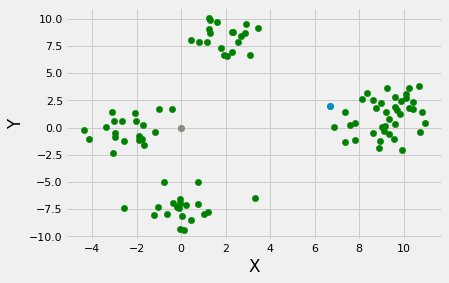

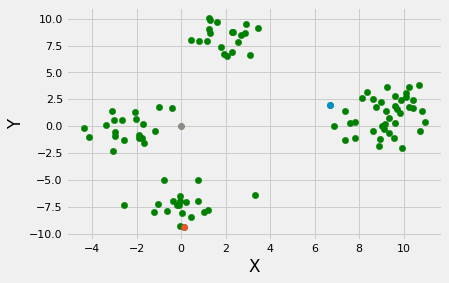

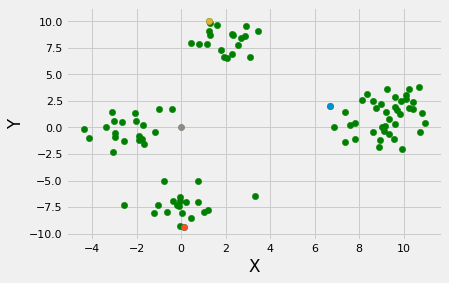

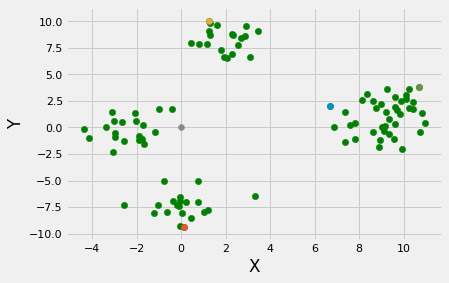

[[ 6.69133079  1.99327334]
 [ 0.10310722 -9.36293149]
 [ 1.23627023 10.08227449]
 [10.71559836  3.83234886]
 [-2.55282645 -7.34289128]]


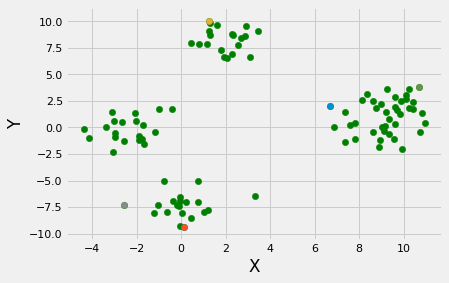

0


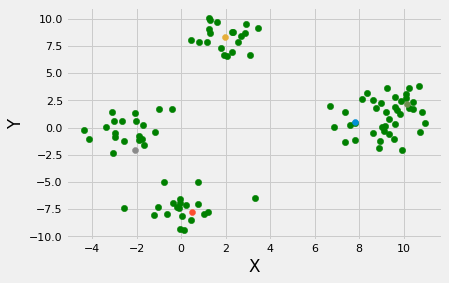

1


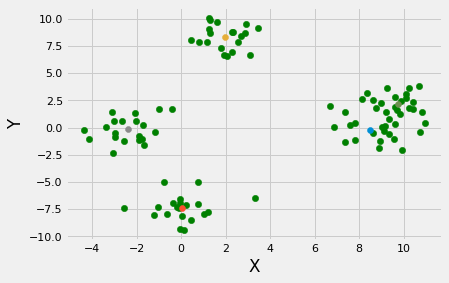

2


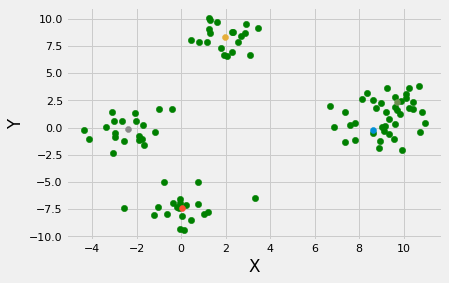

In [46]:
#kmeans
import numpy as np
import pandas as pd
class Kmeans():
    '''
    K-means algorithm from scratch
    Input: data,no_of_cluster,max_iteration
    '''
    def __init__(self,data,no_of_cluster,max_iteration):
        self.data = data
        self.data_rows = data.shape[0]
        self.data_cols = data.shape[1]
        self.no_of_cluster  = no_of_cluster
        self.max_iteration = max_iteration
        self.centroids = np.zeros((self.no_of_cluster,self.data_cols))

    def initialize_centroid_random(self):
      '''
      initialized centroid with random number
      centroid dimension = each row specifies one cluster
      '''
      #colXno_of_cluster data 
      centroids =  np.random.rand(self.no_of_cluster,self.data_cols)
      return centroids
    
    def initialize_centroid_random_sampaling(self):
      '''
      initialized centroid with random number
      centroid dimension = each row specifies one cluster
      '''
      #colXno_of_cluster data 
      data = pd.DataFrame(self.data)
      for i in range(self.no_of_cluster):
        sampling  = data.sample(n=int(self.data_rows *0.01))
        self.centroids[i,:] =  np.mean(sampling,axis=0)

    def initialize_centroid(self):
      '''
      initialized centroid taking half of the dataset
      centroid dimension = each row specifies one cluster
      '''
      #colXno_of_cluster data 
      k = int(self.data_rows/self.no_of_cluster)  #appriximate
      j=0
      for i in range(self.no_of_cluster):
          # print(self.data[j:k,:])
          self.centroids[i,:] = np.mean(self.data[j:k,:],axis=0)
          j=j+k
          k=k+k
    
    def initialize_centroid_rand_uniform(self):
      '''
      Best out of all
      centroids by taking random uniform of (min,max) of all dimention
      '''
      #colXno_of_cluster data 
      max_dim_array = np.amax(self.data,axis=0)
      min_dim_array = np.amin(self.data,axis=0)
      for i in range(self.data_cols):
            #updating centroids colmwise
            self.centroids[:,i] = np.random.uniform(max_dim_array[i],min_dim_array[i],self.no_of_cluster)
    
    def initialize_centroid_uniform(self):
      '''
      centroids by taking linear uniform of (min,max) of all dimention
      '''
      #colXno_of_cluster data 
      max_dim_array = np.amax(self.data,axis=0)
      min_dim_array = np.amin(self.data,axis=0)
      for i in range(self.data_cols):
            #updating centroids colmwise
            self.centroids[:,i] = np.linspace(max_dim_array[i],min_dim_array[i],self.no_of_cluster)
    
    def least_distance_from_point(self,dist_from_points):
      '''
      It will measure distance from given point 
      '''
      distance  = np.zeros((self.data_rows,len(dist_from_points)))
      sum_distace = np.zeros((self.data_rows,1))
      for i in range(len(dist_from_points)):
        data_matrix = np.ones((self.data_rows,self.data_cols)) * dist_from_points[i,:]  #matix single data point by repetation
        distance_from_centroid = self.data - data_matrix   #subtraction of all data point from given data point
        distance[:,i] = np.linalg.norm(distance_from_centroid,axis=1) #calcualting distacne 
      distance = np.sum(distance,axis=1)  #sum if more than 1 points 
      max_index = np.where(distance == np.max(distance,axis=0)) #index of maximum distance 
      next_centroid = self.data[max_index,:]
      return next_centroid   

    def initialize_centroid_max(self):
      '''
      centroids by taking taking arandom point then assigning max and then 
      finding point at max distance and then point at max distance to both 
      '''
      #colXno_of_cluster data 
      print('Initialization of cluster from')
      data = pd.DataFrame(self.data)
      self.centroids[0,:] = data.sample(n=1)
      for i in range(1,self.no_of_cluster):
        self.plotting(self.data)
        self.centroids[i,:] = self.least_distance_from_point(self.centroids[:i+1,:])
      
    def calculate_dist(self,data):
      '''
      data = nXm 
      centroid =mX no_of_cluster
      '''
      '''
      #centroid into matrix form 
      to find out norm have to subtraction and for that have to generate matrix of each centroid 
      by repeting the each centroid times no_of_rows
      '''
      distance  = np.zeros((self.data_rows,self.no_of_cluster))
      for i in range(self.no_of_cluster):
        centroid_matrix = np.ones((self.data_rows,self.data_cols)) * self.centroids[i,:]
        distance_from_centroid = data - centroid_matrix
        distance[:,i] = np.square(np.linalg.norm(distance_from_centroid,axis=1)) #as cost fucntion is variance 
      return distance

    def find_nearest_centroid(self,distance):
      '''
      Returns the indices of the minimum values along an axis.
      return labels
      '''
      return np.argmin(distance,axis=1)
    
    def update_centroid(self,data,labels):
      '''
      it will update the centroid location taking mean of newly assigned points
      '''
      new_centroids = np.zeros((self.no_of_cluster,self.data_cols))
      #making new dataset 
      new_data  = np.zeros((self.data_rows,self.data_cols+1))
      new_data[:,:-1] = data
      new_data[:,-1] = labels
      for i in range(self.no_of_cluster):
        filtered_data = new_data[new_data[:,-1] == i]
        new_centroids[i,:] = np.mean(filtered_data[:,:-1],axis=0)
      return new_centroids
    
    def plotting(self,data):         
      #plotting
      plt.scatter(data[:, 0], data[:, 1], s = 40, color = 'g') 
      for i in range(self.no_of_cluster):
            plt.scatter(self.centroids[i,0],self.centroids[i,1])
      plt.xlabel("X") 
      plt.ylabel("Y") 
      plt.show() 
        
    def fit(self,data):
      '''
      main method which wiil call above mehods successively 
      '''
      self.initialize_centroid_max()
      print(self.centroids)
      self.plotting(data)
      for i in range(self.max_iteration):
        distance = self.calculate_dist(data)
        # print(distance)
        labels = self.find_nearest_centroid(distance)
        new_centroids = self.update_centroid(data,labels)
        if(np.linalg.norm(self.centroids-new_centroids) < 0.001):#break if diffn in centroid is less than error
          break
        else:
          self.centroids = new_centroids
        # print(centroids)
        print(i)
        self.plotting(data)
      # return labels,centroids
          
    def predict(self,test_set):
      '''
      It will predict for the test case
      '''
      distance = self.calculate_dist(test_set)
      labels = self.find_nearest_centroid(distance)
      # return labels


# Creating Test DataSets using sklearn.datasets.make_blobs 
from sklearn.datasets.samples_generator import make_blobs 
from matplotlib import pyplot as plt 
from matplotlib import style 

#clustering points
style.use("fivethirtyeight") 
X, y = make_blobs(n_samples = 100, centers = 5,cluster_std = 1, n_features = 2) 
#calling KMeans
kmean_obj = Kmeans(X,5,5)
kmean_obj.fit(X)

# #plotting
# plt.scatter(X[:, 0], X[:, 1], s = 40, color = 'g') 
# plt.xlabel("X") 
# plt.ylabel("Y") 
# plt.show() 
# plt.clf() 



FileNotFoundError: ignored

In [35]:


import numpy as np
from scipy.stats import multivariate_normal

class GMM:
    def __init__(self, k, max_iter=5):
        self.k = k
        self.max_iter = int(max_iter)

    def initialize(self, X):
        self.shape = X.shape
        self.n, self.m = self.shape

        self.phi = np.full(shape=self.k, fill_value=1/self.k)
        self.weights = np.full( shape=self.shape, fill_value=1/self.k)
        
        random_row = np.random.randint(low=0, high=self.n, size=self.k)
        self.mu = [  X[row_index,:] for row_index in random_row ]
        self.sigma = [ np.cov(X.T) for _ in range(self.k) ]

    def e_step(self, X):
        # E-Step: update weights and phi holding mu and sigma constant
        self.weights = self.predict_proba(X)
        self.phi = self.weights.mean(axis=0)
    
    def m_step(self, X):
        # M-Step: update mu and sigma holding phi and weights constant
        for i in range(self.k):
            weight = self.weights[:, [i]]
            total_weight = weight.sum()
            self.mu[i] = (X * weight).sum(axis=0) / total_weight
            self.sigma[i] = np.cov(X.T, 
                aweights=(weight/total_weight).flatten(), 
                bias=True)

    def fit(self, X):
        self.initialize(X)
        
        for iteration in range(self.max_iter):
            self.e_step(X)
            self.m_step(X)
            
    def predict_proba(self, X):
        likelihood = np.zeros( (self.n, self.k) )
        for i in range(self.k):
            distribution = multivariate_normal(
                mean=self.mu[i], 
                cov=self.sigma[i])
            likelihood[:,i] = distribution.pdf(X)
        
        numerator = likelihood * self.phi
        denominator = numerator.sum(axis=1)[:, np.newaxis]
        weights = numerator / denominator
        return weights
    
    def predict(self, X):
        weights = self.predict_proba(X)
        return np.argmax(weights, axis=1)


FileNotFoundError: ignored

In [0]:
#Evaluation
from scipy.stats import mode
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data

#Fit a model:

np.random.seed(42)
gmm = GMM(k=3, max_iter=10)
gmm.fit(X)

#Plot the clusters. Each color is a cluster found by GMM:

def jitter(x):
    return x + np.random.uniform(low=-0.05, high=0.05, size=x.shape)

def plot_axis_pairs(X, axis_pairs, clusters, classes):
    n_rows = len(axis_pairs) // 2
    n_cols = 2
    plt.figure(figsize=(16, 10))
    for index, (x_axis, y_axis) in enumerate(axis_pairs):
        plt.subplot(n_rows, n_cols, index+1)
        plt.title('GMM Clusters')
        plt.xlabel(iris.feature_names[x_axis])
        plt.ylabel(iris.feature_names[y_axis])
        plt.scatter(
            jitter(X[:, x_axis]), 
            jitter(X[:, y_axis]), 
            #c=clusters, 
            cmap=plt.cm.get_cmap('brg'),
            marker='x')
    plt.tight_layout()
    

0.96


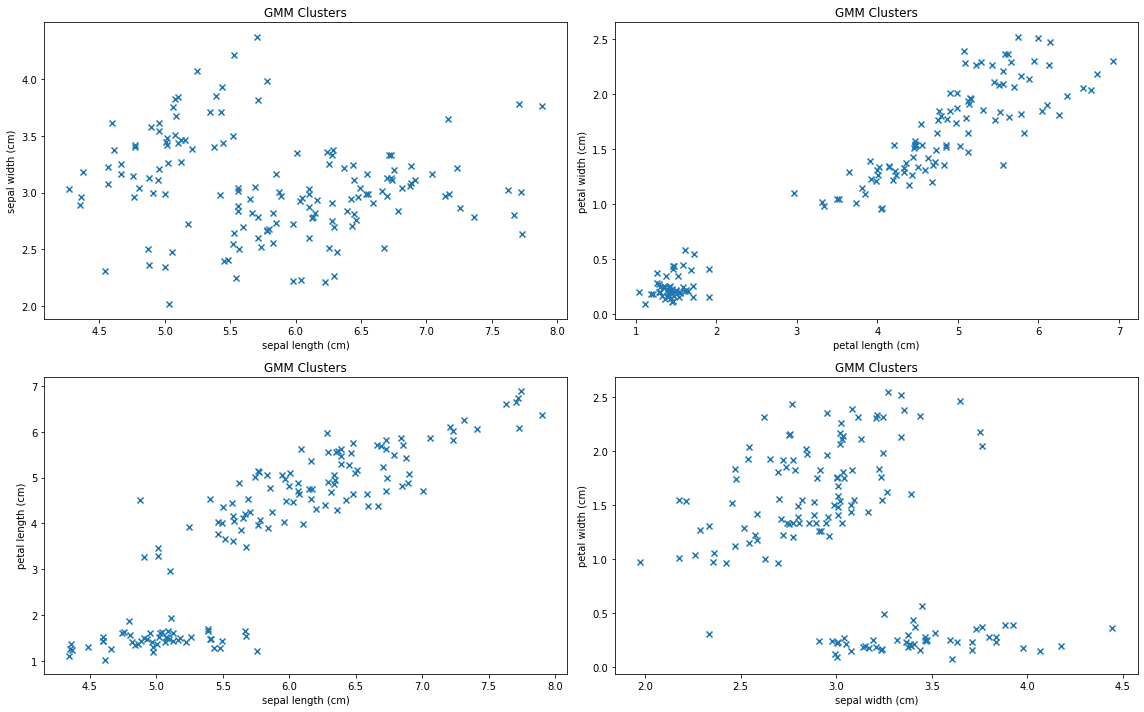

In [0]:
#Result Matrix
permutation = np.array([
    mode(iris.target[gmm.predict(X) == i]).mode.item() 
    for i in range(gmm.k)])
permuted_prediction = permutation[gmm.predict(X)]
print(np.mean(iris.target == permuted_prediction))
confusion_matrix(iris.target, permuted_prediction)
plot_axis_pairs(X=X,axis_pairs=[  (0,1), (2,3),(0,2), (1,3) ],clusters=permuted_prediction,classes=iris.target12)